<a href="https://colab.research.google.com/github/Asma1801/Ensemble-project/blob/main/project_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Breast Cancer in a patient**





#Importing libraries

In [137]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')



#Loading Dataset

In [138]:
cancer = pd.read_csv("cancer.csv")
cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

* radius = Mean of distances from center to points on the perimeter
* texture = Standard deviation of gray-scale values
* perimeter = Observed perimeter of the lump
* area = Observed area of lump
* smoothness = Local variation in radius lengths
* compactness = perimeter^2 / area - 1.0
* concavity = Severity of concave portions of the contour
* concave points = number of concave portions of the contour
* symmetry = Lump symmetry
* fractal dimension  = "coastline approximation" - 1
* Diagnosis =  Whether the patient has cancer or not? ('Malignant','Benign')

#Data Preprocessing

In [139]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [140]:
#dropping id and Unnamed: 32 columns
cancer.drop('id',axis=1,inplace=True)
cancer.drop('Unnamed: 32',axis=1,inplace=True)
cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [141]:
#checking whether the data set contains any null values
cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [142]:
cancer.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

only the diagnoisis column contains the object datatype.
To transform the class labels from their original string (M , B) to 0 and 1's we are using label encoder

## **Label encoder :** 
Encode target labels with value between 0 and n_classes-1. The method works on simple estimators as well as on nested objects (such as Pipeline)

In [143]:
from sklearn.preprocessing import LabelEncoder
diagnosis = LabelEncoder()
diagnosis.fit(cancer.diagnosis)
values = diagnosis.transform(cancer['diagnosis'])
values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [144]:
#Adding the new column to the data frame as 'Diagnosis'
cancer['Diagnosis'] = values
cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Diagnosis  
0          0.4601                  0.11890          1  
1          0.2750                  0.08902          1  
2          0.3613                  0.08758          1  
3          0.6638                  0.17300          1  
4          0.2364                  0.07678          1  

[5 rows x 32 columns]

In [145]:
#lets drop the exsisiting diagnosis column which is having a string object
cancer.drop("diagnosis",axis = 1,inplace = True)
cancer.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Diagnosis  
0          0.4601                  0.11890          1  
1          0.2750                  0.08902          1  
2          0.3613                  0.08758          1  
3          0.6638                  0.17300          1  
4          0.2364                  0.07678          1  

[5 rows x 31 columns]

In [146]:
cancer.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [147]:
#converting the int64 dtype to float64 dtype
cancer.Diagnosis = cancer.Diagnosis.astype("float64")
cancer.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

#**describe():**
The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

In [148]:
cancer.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  texture_worst  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst   Diagnosis  
count               569.000000  569.000000  
mean                  0.083946    0.372583  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    0.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [149]:
cancer.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Diagnosis'],
      dtype='object')

#Relation between the variables



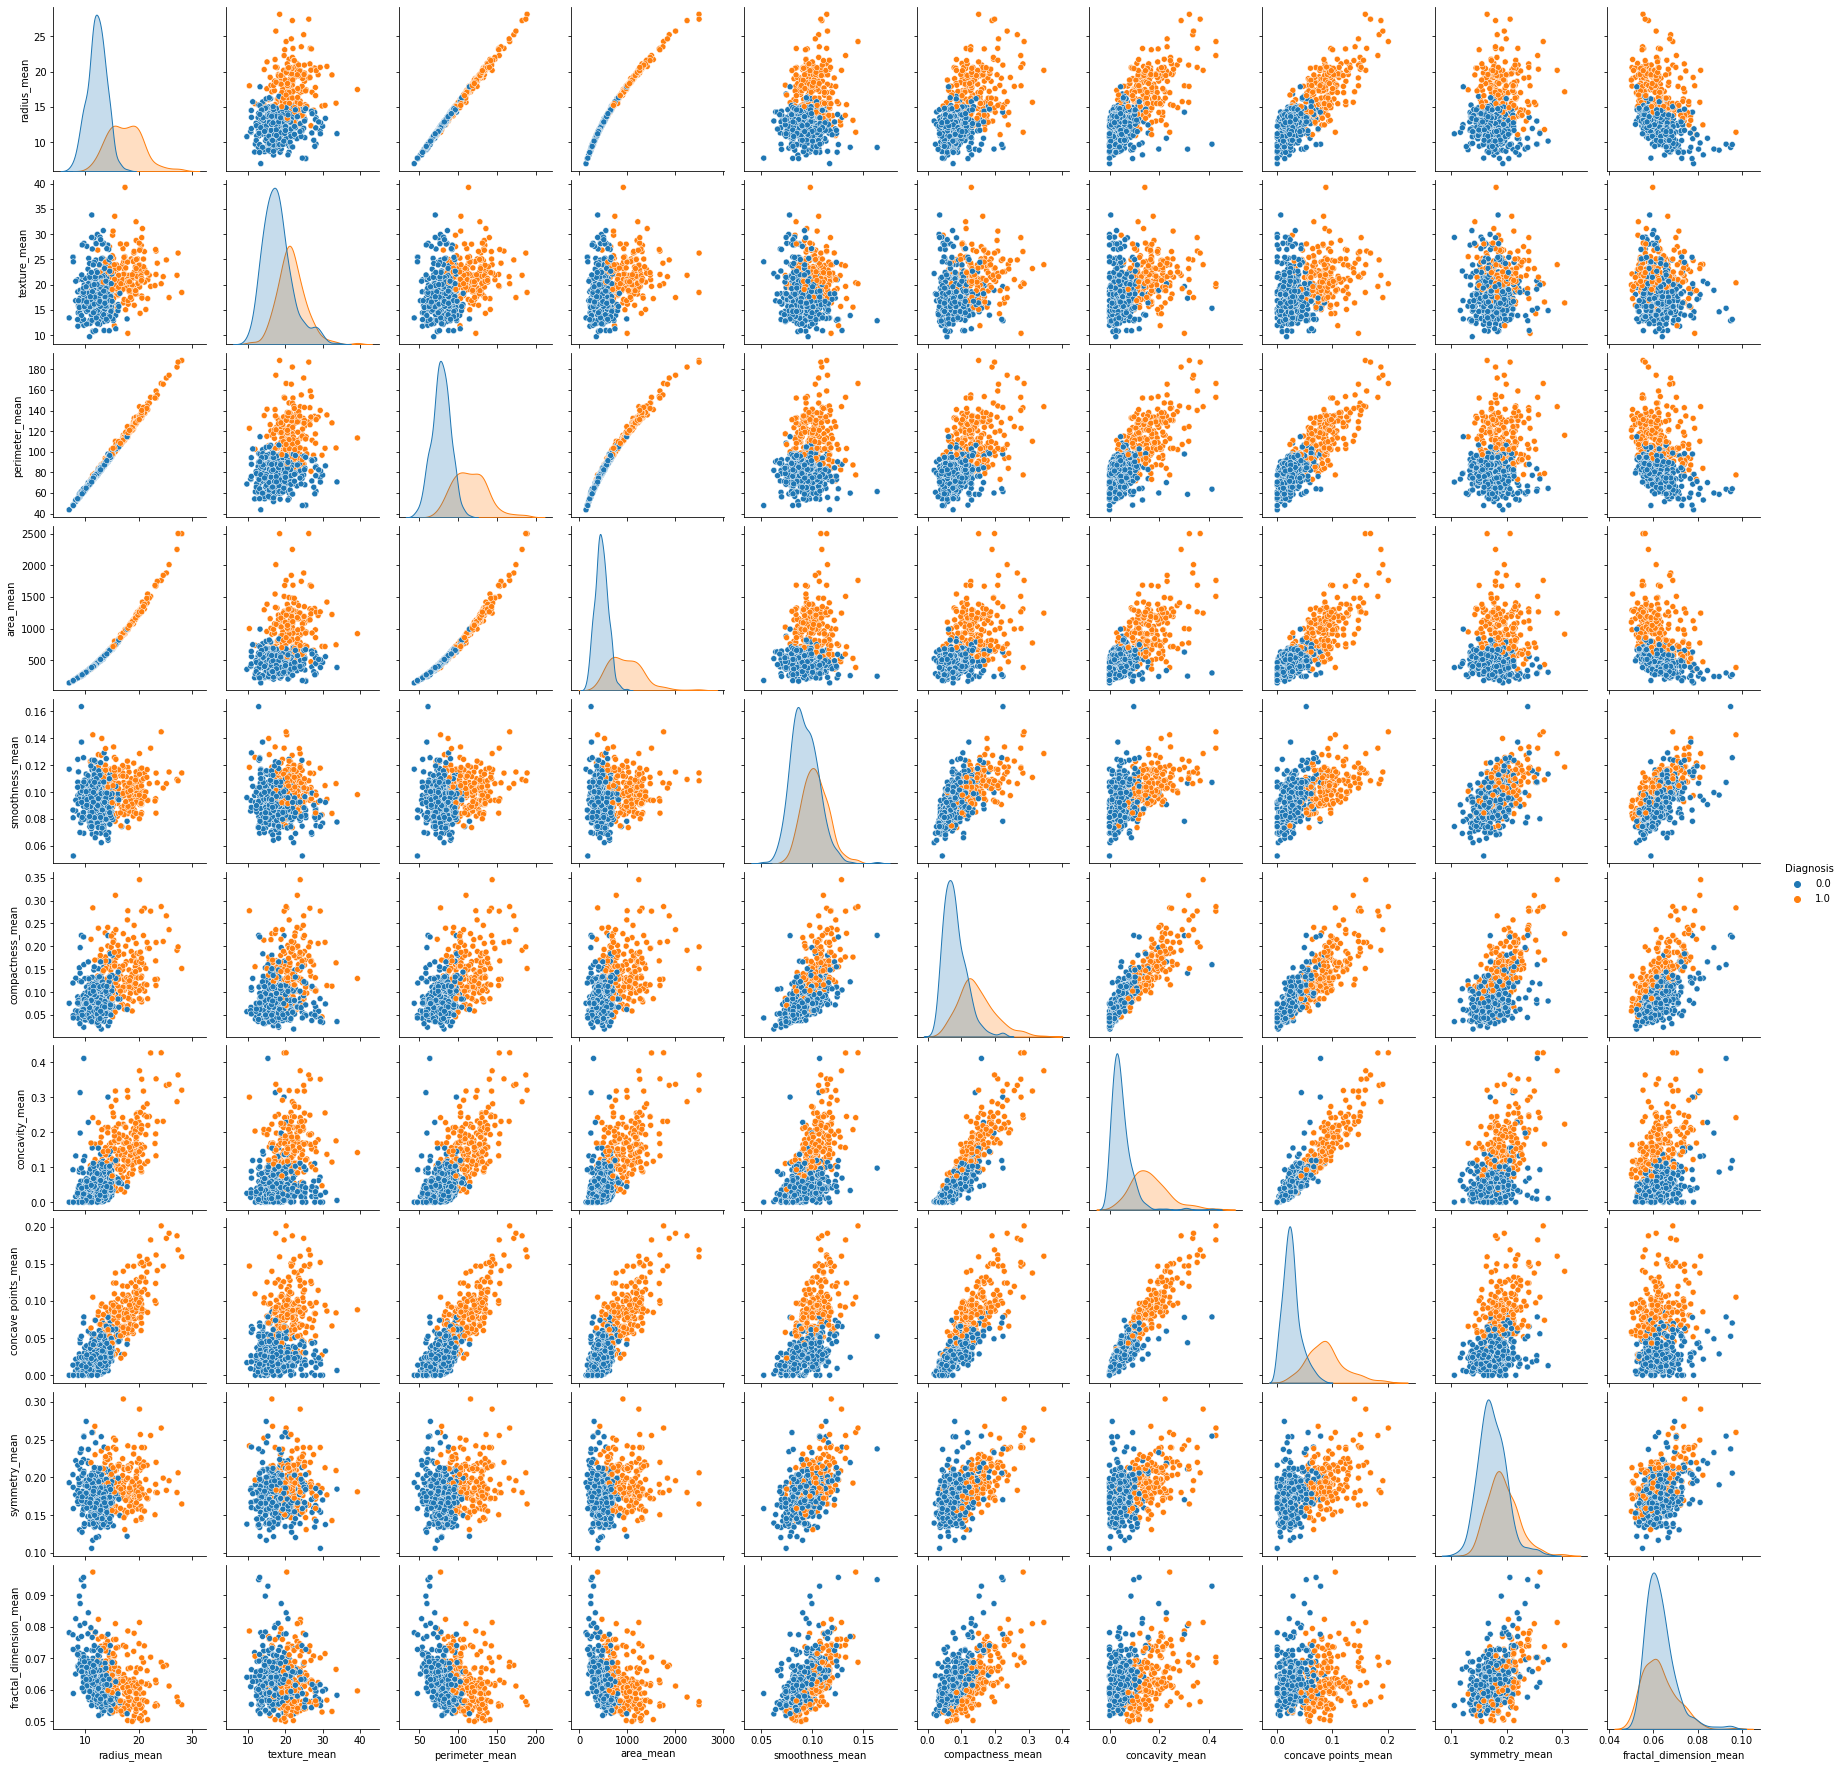

In [150]:
#plotting the plot by visualizing the diagnosis and mean column
sns.pairplot(cancer,hue = 'Diagnosis',vars = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean','smoothness_mean',
                                               'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

# 0.0 ---> Benign
# 1.0 ---> Malignant

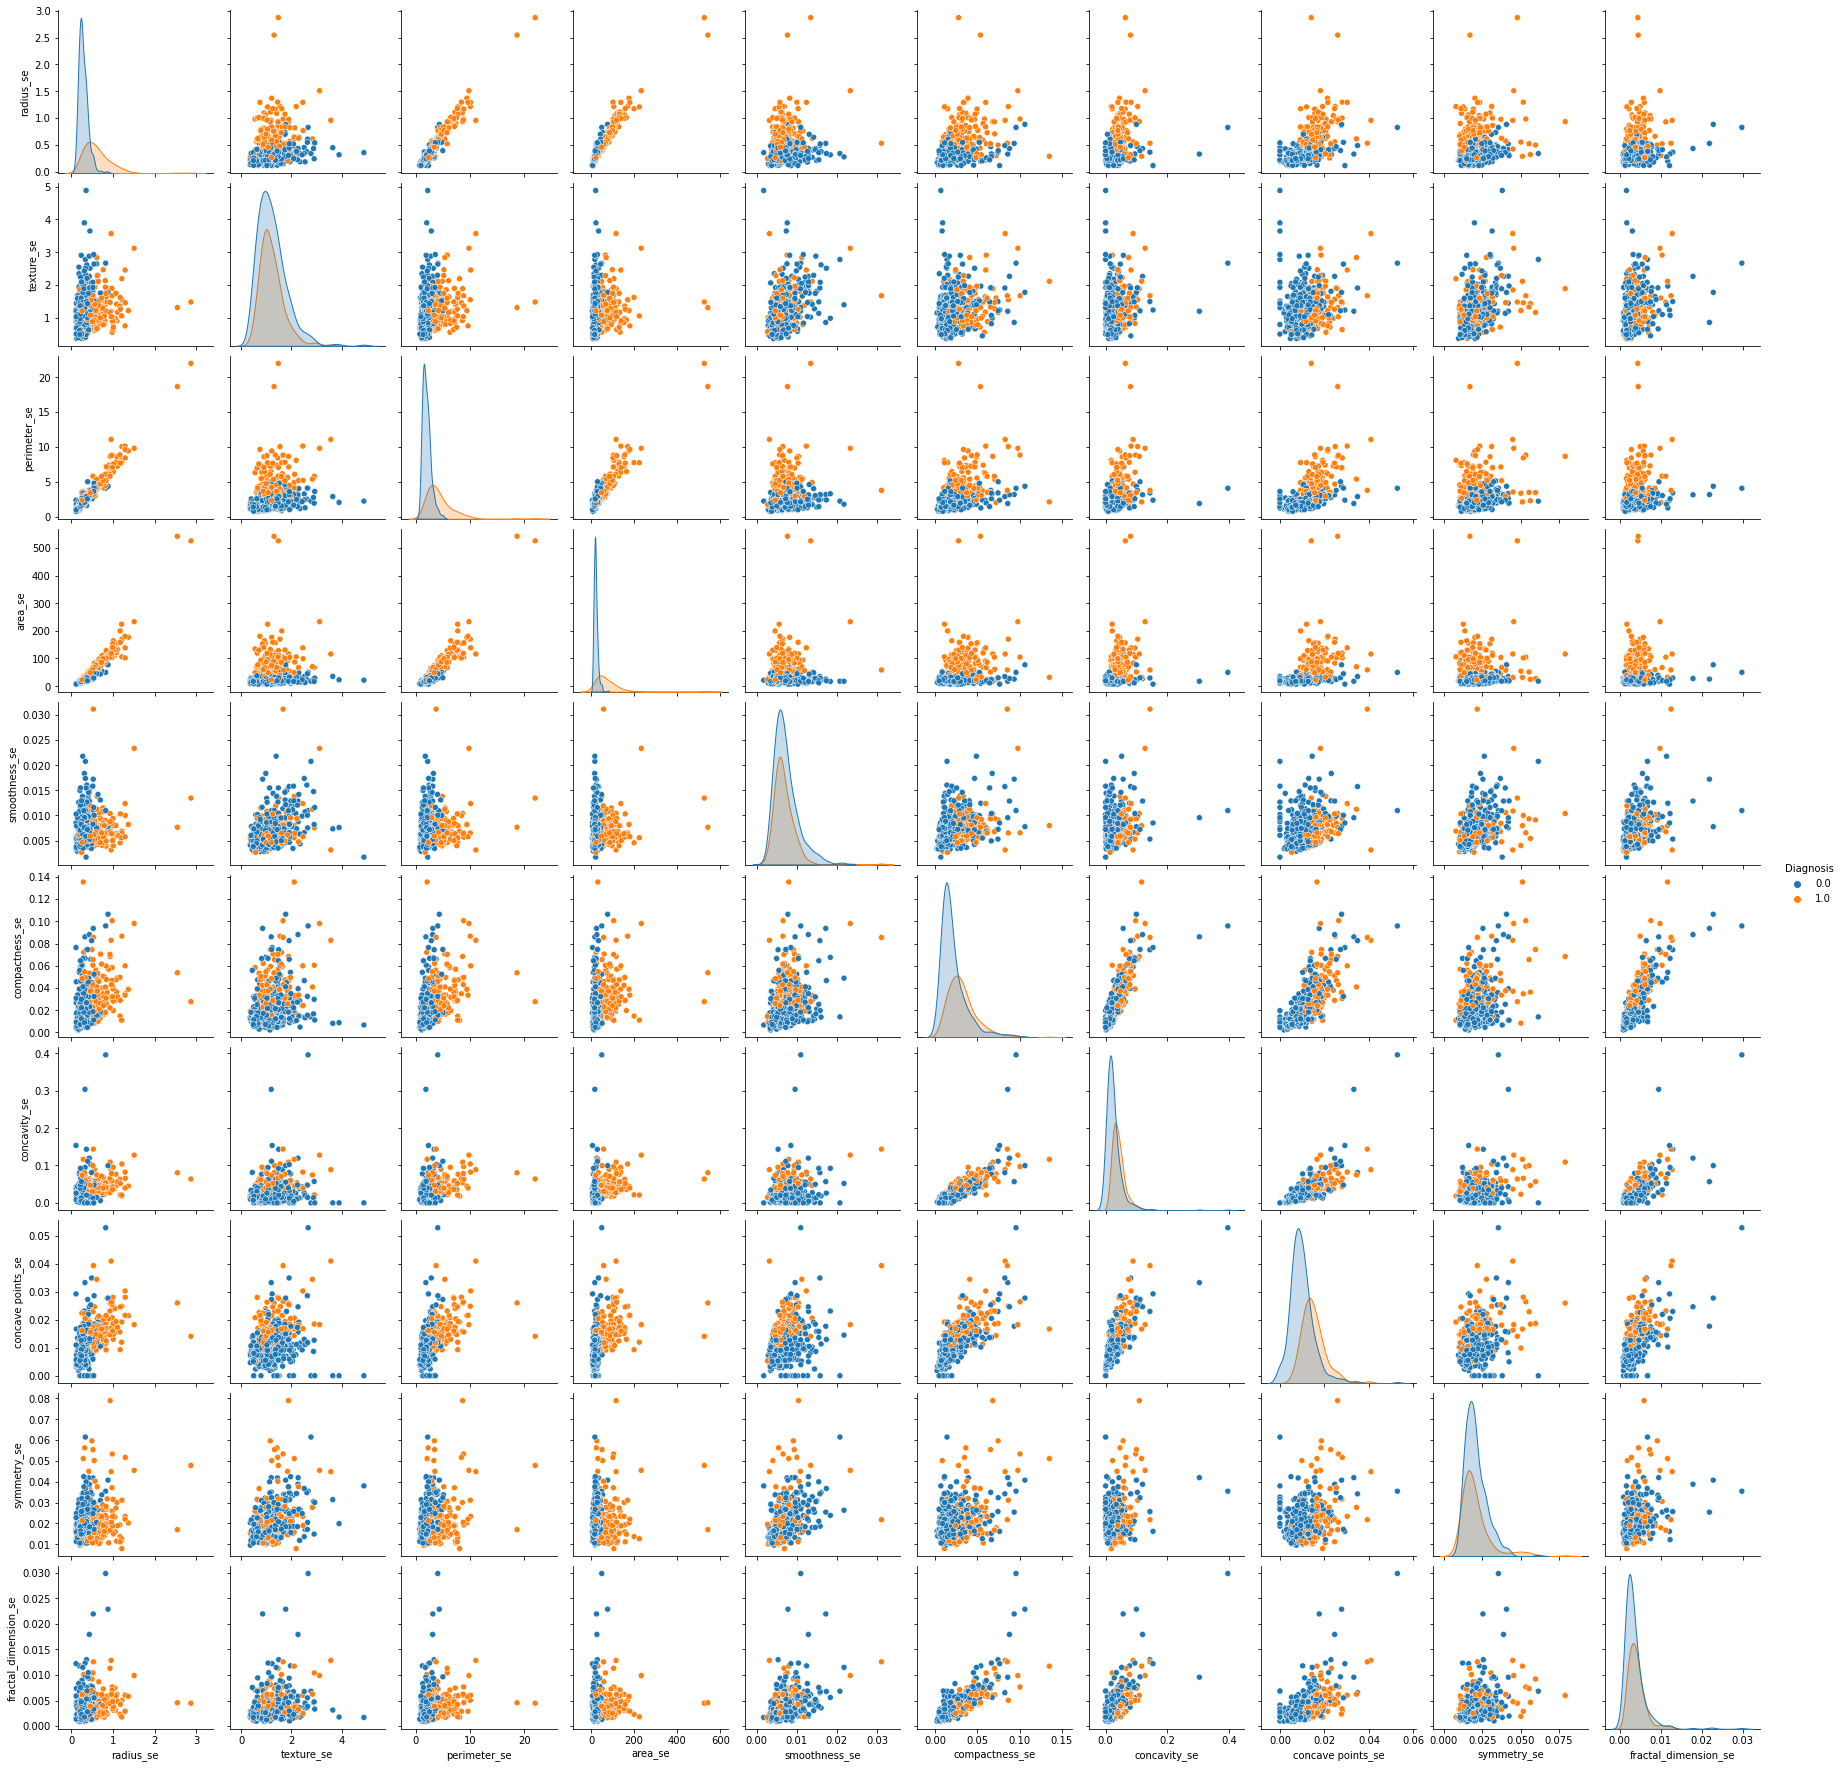

In [151]:
#plotting the plot by visualizing the diagnosis and se column
sns.pairplot(cancer,hue = 'Diagnosis',vars =['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se'])

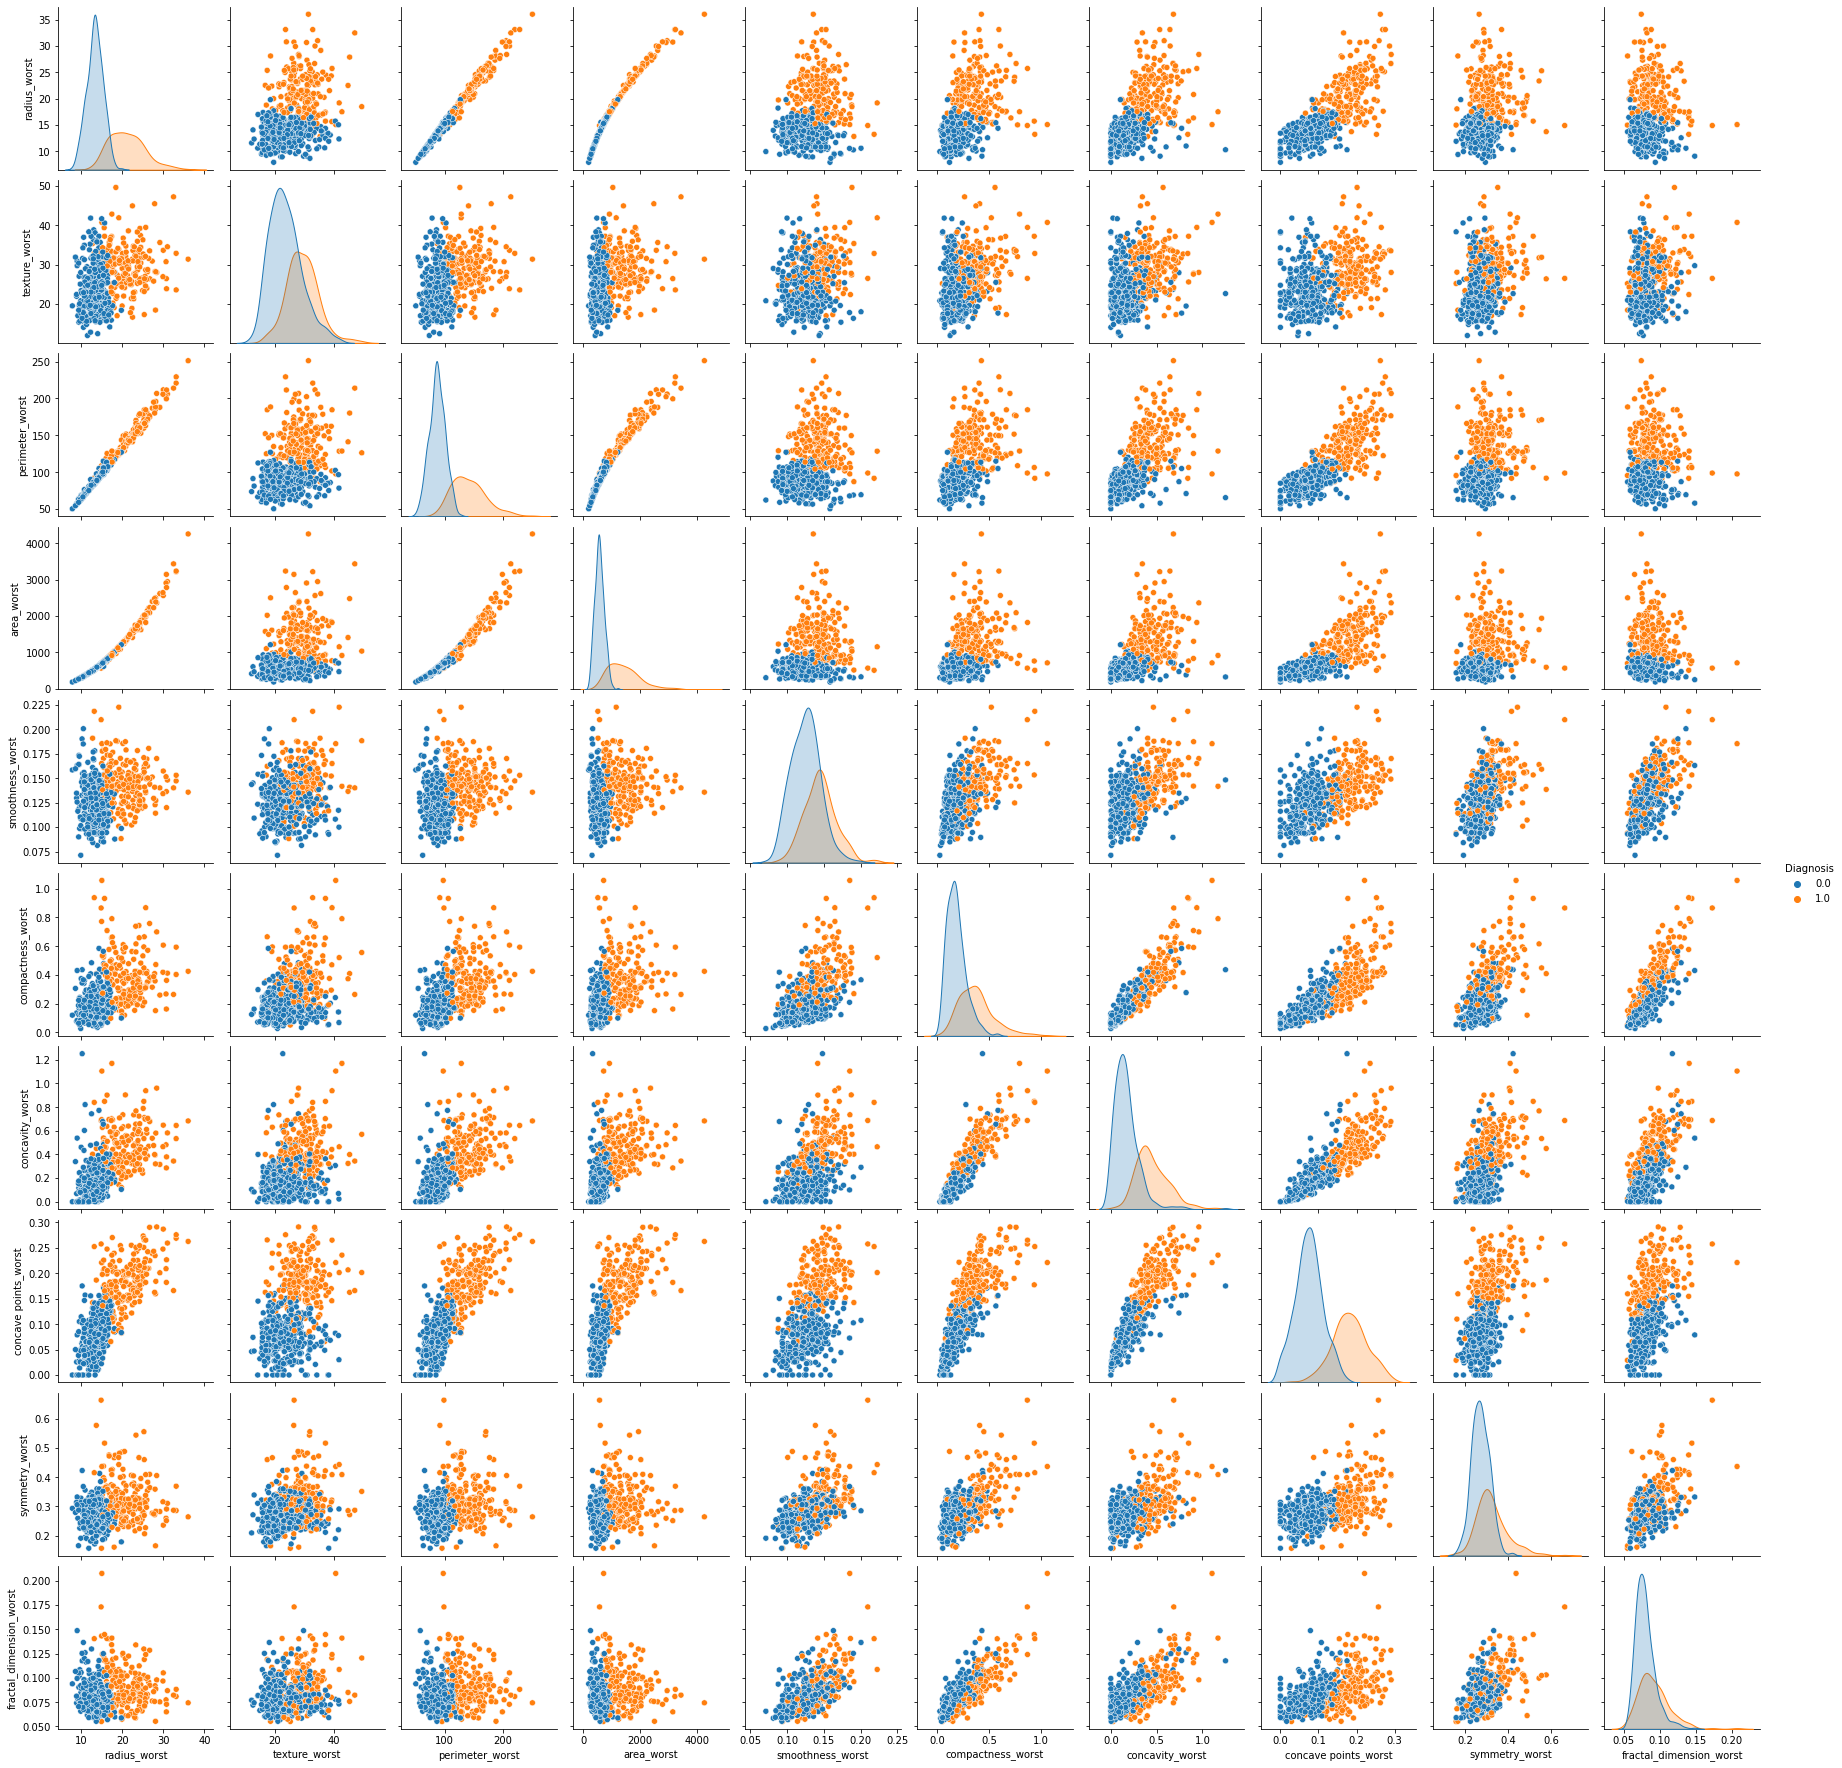

In [152]:
#plotting the plot by visualizing the diagnosis and worst column
sns.pairplot(cancer,hue = 'Diagnosis',vars = [ 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

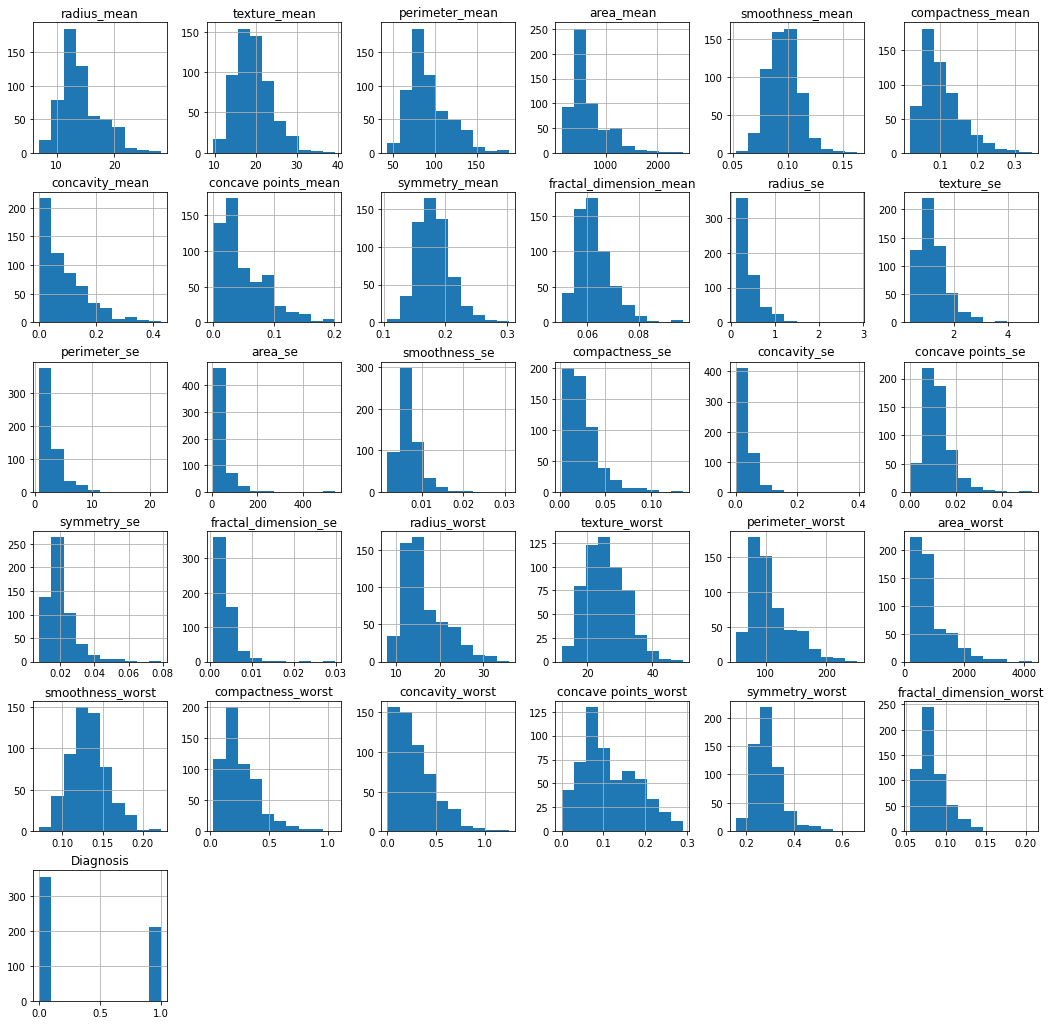

In [153]:
#plotting an histogram for all the columns in data frame
fig = cancer.hist(figsize = [18,18])

# lets check how many benign and malignant variables are there in diagnosis column

In [154]:
data = cancer.Diagnosis.value_counts()
data

0.0    357
1.0    212
Name: Diagnosis, dtype: int64

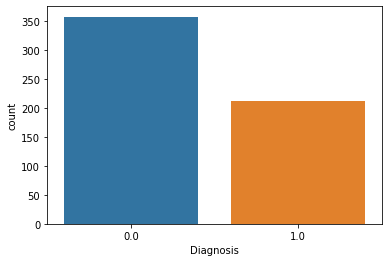

In [155]:
sns.countplot(cancer.Diagnosis)

# Let's check the correlation between the columns o features

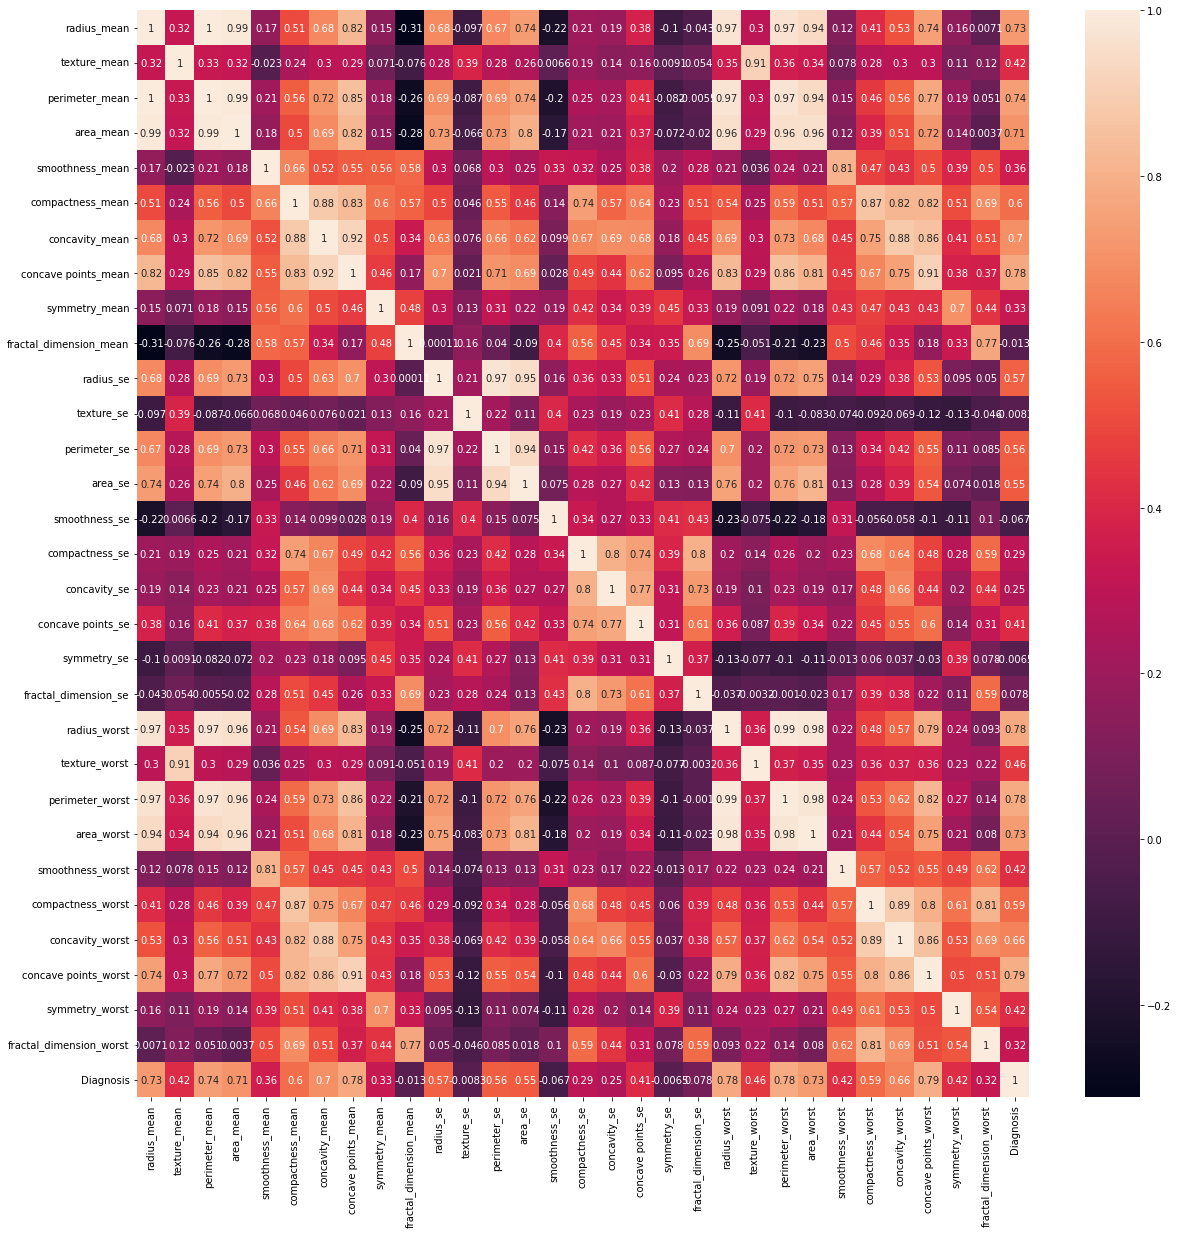

In [156]:
plt.figure(figsize=(20,20))
sns.heatmap(cancer.corr(),annot=True)

As we can see that there is a strong correlation between radius_mean,perimeter_mean,area_mean

In [157]:
cancer1 = cancer.copy(deep = True)
cancer1.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Diagnosis  
0          0.4601                  0.11890        1.0  
1          0.2750                  0.08902        1.0  
2          0.3613                  0.08758        1.0  
3          0.6638                  0.17300        1.0  
4          0.2364                  0.07678        1.0  

[5 rows x 31 columns]

In [158]:
X = cancer.drop('Diagnosis',axis=1)
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [159]:
y = cancer1.Diagnosis
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Diagnosis, dtype: float64

##SVM Model
Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three. 


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import plot_roc_curve, roc_auc_score

splitting data ino train and test

            predicted_cancer  predicted_healthy
is_cancer                 40                  8
is_healthy                 0                 66
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        66
         1.0       1.00      0.83      0.91        48

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114

model score for trainig data :  0.9164835164835164
model score for testing data :  0.9298245614035088


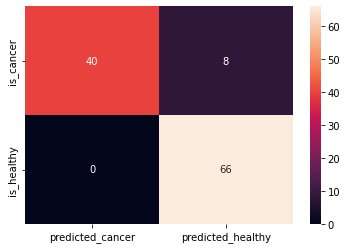

In [173]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)
accuracy = []
model = SVC()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
cm = (confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)

sns.heatmap(confusion,annot = True)
print(classification_report(y_test,y_predict))
#Generating scores for traing and testing data
print("model score for trainig data : " , model.score(x_train, y_train))
print("model score for testing data : " , model.score(x_test, y_test))

In [174]:
ac = accuracy_score(y_test,y_predict)
accuracy.append(ac) 

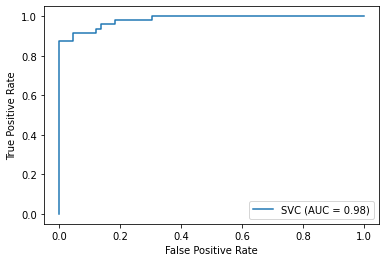

AUC Score of the svm model is:  0.9166666666666667


In [175]:
#create roc plot
plot_roc_curve(model,x_test,y_test)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#auc score
auc = roc_auc_score(y_test,y_predict)
print("AUC Score of the svm model is: ",auc)

#Random forest classifier

            predicted_cancer  predicted_healthy
is_cancer                 45                  3
is_healthy                 0                 66
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        66
         1.0       1.00      0.94      0.97        48

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

model score for trainig data :  1.0
model score for testing data :  0.9736842105263158


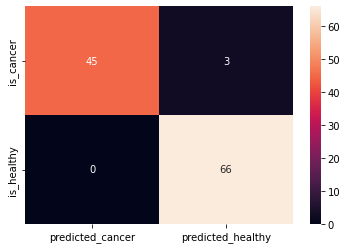

In [176]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
cm = (confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(confusion,annot = True)
print(classification_report(y_test,y_predict))

#Generating scores for traing and testing data
print("model score for trainig data : " , model.score(x_train, y_train))
print("model score for testing data : " , model.score(x_test, y_test))

In [177]:
ac = accuracy_score(y_test,y_predict)
accuracy.append(ac)

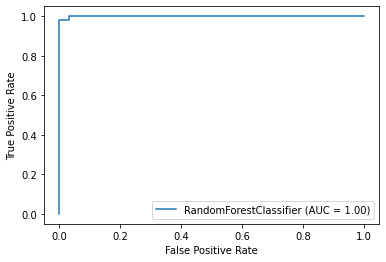

AUC Score of the svm model is:  0.96875


In [178]:
#create roc plot
plot_roc_curve(model,x_test,y_test)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#auc score
auc = roc_auc_score(y_test,y_predict)
print("AUC Score of the svm model is: ",auc)

#Decision tree classifier

            predicted_cancer  predicted_healthy
is_cancer                 44                  4
is_healthy                 3                 63
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95        66
         1.0       0.94      0.92      0.93        48

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

model score for trainig data :  1.0
model score for testing data :  0.9385964912280702


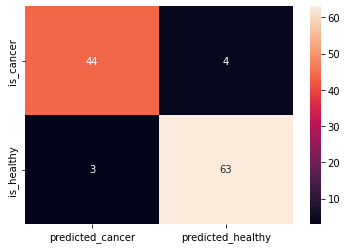

In [179]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
cm = (confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)

sns.heatmap(confusion,annot = True)
print(classification_report(y_test,y_predict))
#Generating scores for traing and testing data
print("model score for trainig data : " , model.score(x_train, y_train))
print("model score for testing data : " , model.score(x_test, y_test))

In [180]:
ac = accuracy_score(y_test,y_predict)
accuracy.append(ac)

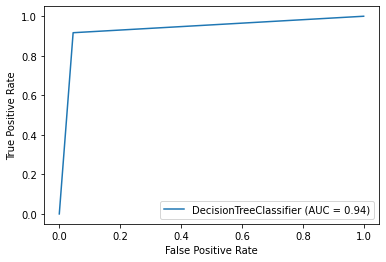

AUC Score of the svm model is:  0.9356060606060607


In [181]:
#create roc plot
plot_roc_curve(model,x_test,y_test)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#auc score
auc = roc_auc_score(y_test,y_predict)
print("AUC Score of the svm model is: ",auc)

#K nearest neighbors

            predicted_cancer  predicted_healthy
is_cancer                 43                  5
is_healthy                 2                 64
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        66
         1.0       0.96      0.90      0.92        48

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

model score for trainig data :  0.9516483516483516
model score for testing data :  0.9385964912280702


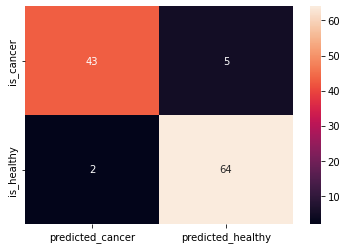

In [182]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
cm = (confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)

sns.heatmap(confusion,annot = True)
print(classification_report(y_test,y_predict))
#Generating scores for traing and testing data
print("model score for trainig data : " , model.score(x_train, y_train))
print("model score for testing data : " , model.score(x_test, y_test))

In [183]:
ac = accuracy_score(y_test,y_predict)
accuracy.append(ac)
accuracy

[0.9298245614035088,
 0.9736842105263158,
 0.9385964912280702,
 0.9385964912280702]

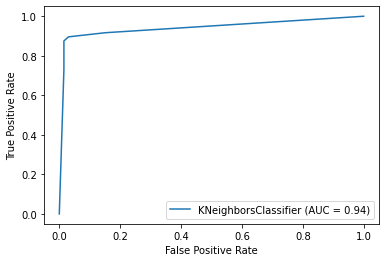

AUC Score of the svm model is:  0.9327651515151517


In [184]:
#create roc plot
plot_roc_curve(model,x_test,y_test)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#auc score
auc = roc_auc_score(y_test,y_predict)
print("AUC Score of the svm model is: ",auc)

Text(0.5, 0, 'Algortihms')

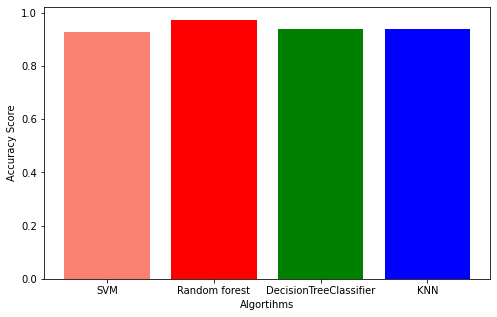

In [185]:
plt.figure(figsize=(8, 5))
plt.bar(['SVM','Random forest','DecisionTreeClassifier','KNN'],accuracy,
        color=['salmon', 'r', 'g', 'b'], label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')

By plotting the accuracy score random forest algorithm accuracy is high

#HyperParameter
Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier.

It is possible and recommended to search the hyper-parameter space for the best cross validation score.

In [186]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear','rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.956 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.901 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.945 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.3s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.956 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=4)

In [187]:
print (grid.best_params_)
print (grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'linear'}
SVC(C=100, gamma=1, kernel='linear')


In [188]:
grid_predictions = grid.predict(x_test)
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion


predicted_cancer  predicted_healthy
is_cancer                 45                  3
is_healthy                 2                 64

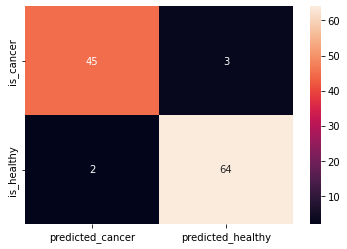

In [189]:
sns.heatmap(confusion,annot=True)

In [190]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        66
         1.0       0.96      0.94      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**The accuracy of our svm model is increased to 96%**